# BAN 530 Capstone
## UNC-W Summer 2021
### Miguel Fernandez

## Bengaluru Restaurant Analysis and Sampling

During this phase, further analysis will be conducted of the Bengaluru restaurant data to generate summary statistics that will be used during prescriptive modeling. The prescriptive model will determine which cuisine(s) should be served at a new restaurant and in which neighborhood to maximize the rating. The statistics generated in the analysis will help determine constraints that we will plug into the model. Some questions we will ask of the data include:
- How many cuisines do restaurants typically serve?
- Are there certain cuisines that appear together?
- Are certain cuisines only served in certain neighborhoods?

We will also create our training, validating, and testing data sets. This will be done by creating an attribute in the data set, `validation`, and assigning each observation to one group.  

Let's get started.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [2]:
processed_df = pd.read_csv('processed_data.csv')

In [3]:
processed_df.head(2)

,address,name,votes,location,dish_liked,cuisines,approx_cost(for_two_people),final_rating,chain,online_order_bin,book_table_bin,casual_dining_bin,btm_bin,hsr_bin,jayanagar_bin,koramangala_5th_block_bin,jp_nagar_bin,marathahalli_bin,whitefield_bin,indiranagar_bin,bannerghatta_road_bin,bellandur_bin,koramangala_6th_block_bin,electronic_city_bin,brigade_road_bin,koramangala_7th_block_bin,koramangala_1st_block_bin,ulsoor_bin,sarjapur_road_bin,banashankari_bin,basavanagudi_bin,kalyan_nagar_bin,richmond_road_bin,frazer_town_bin,brookefield_bin,rajajinagar_bin,kammanahalli_bin,banaswadi_bin,malleshwaram_bin,new_bel_road_bin,koramangala_4th_block_bin,cunningham_road_bin,mg_road_bin,shanti_nagar_bin,church_street_bin,residency_road_bin,ejipura_bin,shivajinagar_bin,domlur_bin,jeevan_bhima_nagar_bin,old_airport_road_bin,st._marks_road_bin,cuisines_lst,north_indian_bin,chinese_bin,south_indian_bin,biryani_bin,fast_food_bin,street_food_bin,seafood_bin,continental_bin,andhra_bin,beverages_bin,mughlai_bin,kerala_bin,italian_bin,rolls_bin,momos_bin,arabian_bin,pizza_bin,burger_bin,kebab_bin,thai_bin,mangalorean_bin,asian_bin,desserts_bin,salad_bin,juices_bin,bengali_bin,bbq_bin,american_bin,healthy_food_bin,sandwich_bin,other_bin
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,775,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,4.1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"['North Indian', 'Mughlai', 'Chinese']",1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,787,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,4.1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"['Chinese', 'North Indian', 'Thai']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### How many cuisines do restaurants typically serve?

In [4]:
# create lambda function to handle string data
f = lambda x: x["cuisines_lst"] \
    .replace("[", "") \
    .replace("'", "") \
    .replace(" ", "") \
    .replace("]", "") \
    .split(',')

# create new cuisines list attribute
processed_df["cuisines_real_list"] = processed_df.apply(f, axis=1)

# create number of cuisines attribute
processed_df['num_cuisines'] = processed_df['cuisines_real_list'].str.len()

In [5]:
processed_df['num_cuisines'].describe()

count    21246.000000
mean         2.510590
std          1.255332
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: num_cuisines, dtype: float64

The table above shows us that on average a restaurant typically serves 2.5 cuisines. There's at least one restaurant that serves an many as eight cuisines. Let's see if the number of cuisines has an impact on rating.

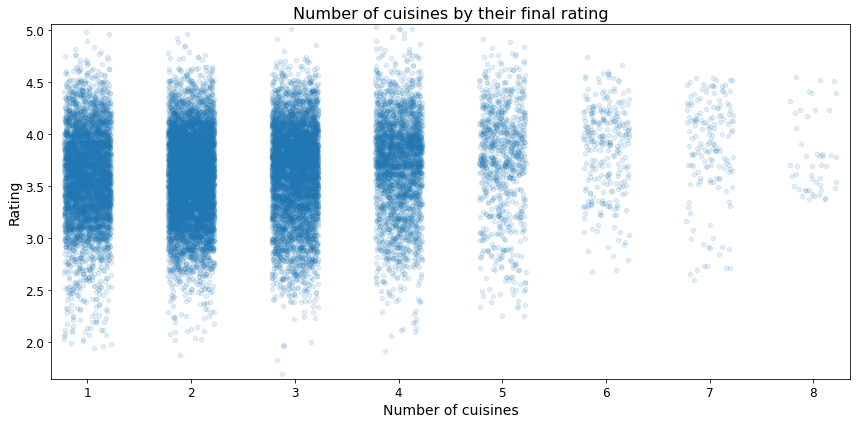

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

processed_df.plot.scatter(x='num_cuisines', y='final_rating', alpha=.125, ax=ax)
dots = ax.collections[-1]
offsets = dots.get_offsets()
jittered_offsets = offsets + np.random.uniform(0.225, -0.225, offsets.shape)
dots.set_offsets(jittered_offsets)

plt.title('Number of cuisines by their final rating', fontsize=16)
plt.xlabel('Number of cuisines', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Rating', fontsize=14)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

The plot above shows the number of cuisines a restaurant serves by their rating. We can see that the majority of restaurants serve four or fewer cuisines. Four cuisines seems to be a sweet spot. It's the last category with a dense cluster of very highly rated restaurants. There is some interesting data when we look at restaurants who serve three cuisines. Those are the lowest rated restaurants. We can also see that very few restaurants serve more than six cuisines. 

Does the type of restaurant influence the number of cuisines?

In [7]:
processed_df.groupby(['casual_dining_bin'])['num_cuisines'] \
    .agg('describe') \
    .sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
casual_dining_bin,,,,,,,,
1,8721.0,2.927187,1.351637,1.0,2.0,3.0,4.0,8.0
0,12525.0,2.220519,1.093699,1.0,1.0,2.0,3.0,8.0


The table shows that on average, casual dining serves 2.9 cuisines while fast food only serves 2.2. We can also see that both types of places serve as many as eight cuisines. However, we will focus on the 75th percentile. We will use those values as constraints during the predictive modeling phase. Meaning, if the model decides a casual dining restaurant should be opened, it can have at most four cuisines and if a fast food restaurant opens, it can serve no more than 3 cuisines.

### Looking at neighborhood and cuisine constraints.

Let's take a look at the top locations for cuisines by rating and votes. This will help us to determine which cuisines should be served in which neighborhoods to maximize a restaurant's rating.  

In [8]:
processed_df.groupby(['location', 'cuisines_lst']).agg({
    'final_rating': 'mean', 'votes': 'sum'
}).sort_values(['final_rating', 'votes'], ascending=False)[0:25]

,,final_rating,votes
location,cuisines_lst,,
Whitefield,"['Asian', 'Mediterranean', 'North Indian', 'BBQ']",4.900000,8494
Indiranagar,"['Healthy Food', 'Salad', 'Mediterranean']",4.900000,246
BTM,"['European', 'Mediterranean', 'North Indian', 'BBQ']",4.900000,44904
Marathahalli,"['European', 'Mediterranean', 'North Indian', 'BBQ']",4.800000,24242
Indiranagar,"['Italian', 'Pizza', 'Beverages']",4.800000,10523
Whitefield,"['European', 'Mediterranean', 'North Indian', 'BBQ']",4.800000,8773
Marathahalli,"['Continental', 'North Indian', 'Asian', 'Italian']",4.800000,7864
Malleshwaram,['BBQ'],4.750000,2683
JP Nagar,"['North Indian', 'European', 'Mediterranean', 'BBQ', 'Kebab']",4.712500,30822


The table above shows the top 25 neighborhoods and the cuisines that are served in them by their rating and the number of votes they have received. For example, in the Indiranagar neighborhood, health food restaurants are highly reviewed. However, there are very few votes so we may not consider this combination for the constraints in the prescriptive model. It does appear that Italian food, pizza, and beverages are incredibly popular in the neighborhood. There are more than 10,000 votes and an average rating of 4.8. This combination will be used in the prescriptive model. We will say if the Indiranagar neighborhood is chosen, it must serve at least one of these types of cuisines. 

Let's also take a look at the bottom 25 locations and cuisines so we might understand which cuisines should not be served in which neighborhoods.

In [9]:
processed_df.groupby(['location', 'cuisines_lst']).agg({
    'final_rating': 'mean', 'votes': 'sum'
}).sort_values(['final_rating', 'votes'], ascending=False)[-25:]

final_rating  \
location              cuisines_lst                                                       
Bellandur             ['Fast Food', 'Continental']                            2.600000   
HSR                   ['Andhra', 'Biryani', 'North Indian']                   2.600000   
JP Nagar              ['Chinese', 'South Indian', 'North Indian']             2.588889   
                      ['North Indian', 'Chinese', 'Fast Food', 'Rolls...      2.500000   
Whitefield            ['South Indian', 'North Indian', 'Chinese', 'St...      2.500000   
Indiranagar           ['North Indian', 'Chinese', 'Arabian']                  2.500000   
Ulsoor                ['Italian', 'Pizza']                                    2.500000   
Whitefield            ['North Indian', 'Chinese', 'Arabian', 'Biryani...      2.450000   
Bannerghatta Road     ['South Indian', 'North Indian', 'Chinese', 'St...      2.433333   
Koramangala 1st Block ['North Indian', 'Mughlai', 'Biryani']                  2.400000   
Indiranagar           ['Healthy Food', 'Sandwich', 'Salad']                   2.400000   
Bannerghatta Road     ['Pizza']                                               2.400000   
                      ['North Indian', 'Chinese', 'Thai']                     2.400000   
Kalyan Nagar          ['Fast Food', 'Burger', 'Pizza']                        2.400000   
Richmond Road         ['Chinese', 'South Indian', 'North Indian']             2.300000   
Rajajinagar           ['North Indian', 'Chinese', 'South Indian', 'St...      2.300000   
Bannerghatta Road     ['South Indian', 'North Indian', 'Chinese', 'St...      2.300000   
Bellandur             ['Andhra', 'South Indian', 'Chinese', 'North In...      2.300000   
Banaswadi             ['Andhra', 'South Indian', 'Chinese', 'North In...      2.300000   
Residency Road        ['Kerala', 'Seafood']                                   2.240000   
Marathahalli          ['Pizza']                                               2.200000   
MG Road               ['Mexican']                                             2.200000   
Marathahalli          ['Biryani', 'North Indian']                             2.100000   
                      ['Andhra', 'South Indian', 'Chinese', 'North In...      2.000000   
Church Street         ['North Indian', 'Continental', 'Chinese']              1.800000   

                                                                          votes  
location              cuisines_lst                                               
Bellandur             ['Fast Food', 'Continental']                           40  
HSR                   ['Andhra', 'Biryani', 'North Indian']                  40  
JP Nagar              ['Chinese', 'South Indian', 'North Indian']          1871  
                      ['North Indian', 'Chinese', 'Fast Food', 'Rolls...   1926  
Whitefield            ['South Indian', 'North Indian', 'Chinese', 'St...    544  
Indiranagar           ['North Indian', 'Chinese', 'Arabian']                330  
Ulsoor                ['Italian', 'Pizza']                                  170  
Whitefield            ['North Indian', 'Chinese', 'Arabian', 'Biryani...    508  
Bannerghatta Road     ['South Indian', 'North Indian', 'Chinese', 'St...   1007  
Koramangala 1st Block ['North Indian', 'Mughlai', 'Biryani']                318  
Indiranagar           ['Healthy Food', 'Sandwich', 'Salad']                 261  
Bannerghatta Road     ['Pizza']                                             204  
                      ['North Indian', 'Chinese', 'Thai']                   192  
Kalyan Nagar          ['Fast Food', 'Burger', 'Pizza']                      192  
Richmond Road         ['Chinese', 'South Indian', 'North Indian']           700  
Rajajinagar           ['North Indian', 'Chinese', 'South Indian', 'St...    716  
Bannerghatta Road     ['South Indian', 'North Indian', 'Chinese', 'St...    582  
Bellandur             ['Andhra', 'South Indian', 'Chinese', 'North In...    526  
Ban

The table above displays the bottom 25 performing combinations. We can set a few constraints based on this information. For example, if pizza is served, it cannot be served in Ulsoor, Bannerghatta Road, or Marathahalli. Another constraint will be that if the MG Road neighborhood is chosen, it cannot serve Mexican food.  

### Looking at cuisine combinations

In [10]:
processed_df.loc[
    (processed_df['north_indian_bin'] == 1) & (processed_df['bbq_bin'] == 1)
].agg({
    'final_rating': 'describe',
    'votes': 'describe'
})

,final_rating,votes
count,215.000000,215.000000
mean,4.054419,1716.930233
std,0.531412,2213.506914
min,2.800000,4.000000
25%,3.800000,151.500000
50%,4.100000,847.000000
75%,4.400000,2346.000000
max,4.900000,12121.000000


We can see that those restaurants that serve North Indian and BBQ cuisines are quite popular. The average number of votes for a restaurant is 1,716 and the average rating is just above 4.0. This combination also has a maximum rating value of 4.9 which is almost a perfect 5.0. This will be a constraint in the model. If North Indian food is served, so must BBQ. 

In [11]:
processed_df.loc[
    (processed_df['burger_bin'] == 1) & (processed_df['chinese_bin'] == 1)
].agg({
    'final_rating': 'describe',
    'votes': 'describe'
})

,final_rating,votes
count,21.000000,21.000000
mean,3.180952,76.476190
std,0.305972,143.786167
min,2.800000,4.000000
25%,2.900000,20.000000
50%,3.200000,32.000000
75%,3.400000,47.000000
max,3.700000,506.000000


The table above shows those restaurants that serve burgers as well as Chinese food. We can see that the average rating is only 3.2 and there are only 21 observations in the data set that serve burgers and Chinese food. We will use this as a constraint in the prescriptive model. If a restaurant serves burgers, it cannot serve Chinese food.

Those represent a selection of the constraints that will we used later during the predictive modeling phase. 

### Validation

The final step we need to perform is to create a validation attribute where we will split the data for predictive modeling.

In [12]:
# set random seet
np.random.seed(32)

# split data for validation
train, validate, test = np.split(processed_df.sample(frac=1), [int(.6*len(processed_df)), int(.8*len(processed_df))])

In [13]:
# add validation column to split data
train['validation'] = 'train'
validate['validation'] = 'validate'
test['validation'] = 'test'

# merge data set
sampled_df = pd.concat([train, validate, test])

In [14]:
# write csv file
sampled_df.to_csv('sampled_data.csv', index=False) 